In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Linear regression

In [3]:
train_data = pd.read_csv('../data/train_final.csv')
train_data = train_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview'])
X_train = train_data.drop(columns=['IMDB Score'])
print(np.cov(train_data['IMDB Score']))

1.3749116441929752


In [4]:
# valid_data = pd.read_csv('../data/valid_final.csv')
# valid_data = valid_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview'])
# valid_X = valid_data.drop(columns=['IMDB Score'])
# print(np.cov(valid_data['IMDB Score']))

1.3261752115079182


In [4]:
test_data = pd.read_csv('../data/test_final.csv')
test_data = test_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview'])
X_test = test_data.drop(columns=['IMDB Score'])
print(np.cov(test_data['IMDB Score']))

1.3698599720979419


In [5]:
X_train.head()

,runtime,budget,horror,comedy,family,fantasy,adventure,drama,history,romance,...,Gary,possibly,guilt,minister,Lou,niece,respect,Western,spree,creator
0,52.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,125.0,15000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,83.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
linearRegression = LinearRegression().fit(X_train, train_data['IMDB Score'])

In [14]:
print('train R^2: ', linearRegression.score(X_train, train_data['IMDB Score']))
print('test R^2: ', linearRegression.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(linearRegression.predict(X_train), train_data['IMDB Score']))
print('train MAE: ', mean_absolute_error(linearRegression.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(linearRegression.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(linearRegression.predict(X_test), test_data['IMDB Score']))

train R^2:  0.5469532634174328
test R^2:  0.3615194589066031
train MAE:  0.6031675024259086
train MAE:  0.7248295216204385
train MSE:  0.6228400675303715
test MSE:  0.874435134094227


In [8]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}
linearModel = GridSearchCV(estimator=LinearRegression(), param_grid=parameters, scoring='r2', cv=5).fit(X_train, train_data['IMDB Score'])

In [12]:
print("best estimator: ", linearModel.best_estimator_)
print("best params: ", linearModel.best_params_)
print("best score: ", linearModel.best_score_)

best estimator:  LinearRegression()
best params:  {'fit_intercept': True, 'normalize': False}
best score:  0.29958765272908744


In [25]:
linearRegressionGrid = LinearRegression(fit_intercept= True, normalize=False).fit(X_train, train_data['IMDB Score'])
print('train R^2: ', linearRegressionGrid.score(X_train, train_data['IMDB Score']))
print('test R^2: ', linearRegressionGrid.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(linearRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(linearRegressionGrid.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(linearRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(linearRegressionGrid.predict(X_test), test_data['IMDB Score']))

train R^2:  0.5469532634174328
test R^2:  0.3615194589066031
train MAE:  0.6031675024259086
test MAE:  0.7248295216204385
train MSE:  0.6228400675303715
test MSE:  0.874435134094227


# Ridge regression

In [19]:
ridgeRegression = Ridge(alpha=10, normalize=True, random_state=0).fit(X_train, train_data['IMDB Score'])

print('Train R^2: ', ridgeRegression.score(X_train, train_data['IMDB Score']))
print('Test R^2: ', ridgeRegression.score(X_test, test_data['IMDB Score']))

print('Train MAE: ', mean_absolute_error(ridgeRegression.predict(X_train), train_data['IMDB Score']))
print('Test MAE: ', mean_absolute_error(ridgeRegression.predict(X_test), test_data['IMDB Score']))

print('Train MSE: ', mean_squared_error(ridgeRegression.predict(X_train), train_data['IMDB Score']))
print('Test MSE: ', mean_squared_error(ridgeRegression.predict(X_test), test_data['IMDB Score']))

Train R^2:  0.14921849413953459
Test R^2:  0.12596594545080564
Train MAE:  0.8430023954492178
Test MAE:  0.8545487903574828
Train MSE:  1.169638290656023
Test MSE:  1.197038964388495


In [ ]:
parameters = {'alpha':[1,5,10,30], 'fit_intercept':[True,False], 'normalize':[True]}
ridgeModel = GridSearchCV(estimator=Ridge(), param_grid=parameters, scoring='r2', cv=5, error_score='raise').fit(X_train, train_data['IMDB Score'])

In [23]:
print(ridgeModel.best_estimator_)
print(ridgeModel.best_params_)
print(ridgeModel.best_score_)

Ridge(alpha=1, normalize=True)
{'alpha': 1, 'fit_intercept': True, 'normalize': True}
0.35859458007599365


In [24]:
ridgeRegressionGrid = Ridge(alpha=1, fit_intercept=True, normalize=True, random_state=0).fit(X_train, train_data['IMDB Score'])

print('Train R^2: ', ridgeRegressionGrid.score(X_train, train_data['IMDB Score']))
print('Test R^2: ', ridgeRegressionGrid.score(X_test, test_data['IMDB Score']))

print('Train MAE: ', mean_absolute_error(ridgeRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('Test MAE: ', mean_absolute_error(ridgeRegressionGrid.predict(X_test), test_data['IMDB Score']))

print('Train MSE: ', mean_squared_error(ridgeRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('Test MSE: ', mean_squared_error(ridgeRegressionGrid.predict(X_test), test_data['IMDB Score']))

Train R^2:  0.4471618617605746
Test R^2:  0.35788726526000325
Train MAE:  0.6677622829582377
Test MAE:  0.7228114470349141
Train MSE:  0.7600313953296844
Test MSE:  0.879409628278469


# Lasso (Least Absolute Shrinkage and Selection Operator)

In [26]:
lassoRegression = Lasso(alpha=0.01, random_state=0).fit(X_train, train_data['IMDB Score'])

In [27]:
print('train R^2: ', lassoRegression.score(X_train, train_data['IMDB Score']))
print('test R^2: ', lassoRegression.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(lassoRegression.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(lassoRegression.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(lassoRegression.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(lassoRegression.predict(X_test), test_data['IMDB Score']))

train R^2:  0.3067452704795627
test R^2:  0.304028552361731
train MAE:  0.7552564534961796
test MAE:  0.752210485497123
train MSE:  0.9530734639152751
test MSE:  0.953172175144332


In [28]:
parameters = {'alpha':[0.1, 0.01, 0.5], 'fit_intercept':[True,False], 'normalize':[True,False], 'selection':['cyclic', 'random']}
lassoModel = GridSearchCV(estimator=Lasso(), param_grid=parameters, scoring='r2', cv=5, error_score="raise").fit(X_train, train_data['IMDB Score'])

In [29]:
print(lassoModel.best_estimator_)
print(lassoModel.best_params_)
print(lassoModel.best_score_)

Lasso(alpha=0.01)
{'alpha': 0.01, 'fit_intercept': True, 'normalize': False, 'selection': 'cyclic'}
0.30428428001259844


In [30]:
lassoRegressionGrid = Lasso(alpha=0.01, normalize=False, selection='cyclic').fit(X_train, train_data['IMDB Score'])

print('train R^2: ', lassoRegressionGrid.score(X_train, train_data['IMDB Score']))
print('test R^2: ', lassoRegressionGrid.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(lassoRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(lassoRegressionGrid.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(lassoRegressionGrid.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(lassoRegressionGrid.predict(X_test), test_data['IMDB Score']))

train R^2:  0.3067452704795627
test R^2:  0.304028552361731
train MAE:  0.7552564534961796
test MAE:  0.752210485497123
train MSE:  0.9530734639152751
test MSE:  0.953172175144332


# Random Forest

In [31]:
RandomForestReg = RandomForestRegressor(n_estimators=100, max_depth=32).fit(X_train, train_data['IMDB Score'])

In [32]:
print('train R^2: ', RandomForestReg.score(X_train, train_data['IMDB Score']))
print('test R^2: ', RandomForestReg.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(RandomForestReg.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(RandomForestReg.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(RandomForestReg.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(RandomForestReg.predict(X_test), test_data['IMDB Score']))

train R^2:  0.775873758735142
test R^2:  0.3841432891130364
train MAE:  0.42754475097875966
test MAE:  0.7003895126126018
train MSE:  0.30812450895845167
test MSE:  0.8434505218358659


In [36]:
parameters = {'n_estimators':[100, 200], 'max_depth':[16, 32], 'min_samples_leaf': [2, 3]}
randomForestModel = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, scoring='neg_mean_squared_error', cv=5, error_score="raise").fit(X_train, train_data['IMDB Score'])

In [37]:
print(randomForestModel.best_estimator_)
print(randomForestModel.best_params_)
print(randomForestModel.best_score_)

RandomForestRegressor(max_depth=16, min_samples_leaf=2, n_estimators=200)
{'max_depth': 16, 'min_samples_leaf': 2, 'n_estimators': 200}
-0.8275262981829945


In [38]:
randomForestGrid = RandomForestRegressor(n_estimators=200, max_depth=16, min_samples_leaf=2).fit(X_train, train_data['IMDB Score'])

print('train R^2: ', randomForestGrid.score(X_train, train_data['IMDB Score']))
print('test R^2: ', randomForestGrid.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(randomForestGrid.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(randomForestGrid.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(randomForestGrid.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(randomForestGrid.predict(X_test), test_data['IMDB Score']))

train R^2:  0.5901454611731032
test R^2:  0.39978861536412136
train MAE:  0.5750427070666909
test MAE:  0.6947402597916339
train MSE:  0.5634602526135851
test MSE:  0.8220233645807881


Index(['runtime', 'horror', 'documentary', 'budget', 'drama', 'action',
       'animation', 'sci-fi', 'thriller', 'crime', 'comedy', 'the asylum',
       'adventure', 'fantasy', 'mystery', 'short', 'biography', 'family',
       'romance', 'woody allen'],
      dtype='object')


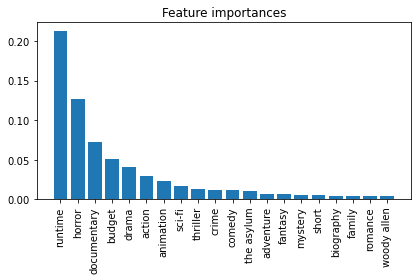

In [40]:
featureImportances = np.argsort(RandomForestReg.feature_importances_)[::-1]
print(X_train.columns[featureImportances[:20]])
plt.figure()
plt.title("Feature importances")
plt.bar(range(20),RandomForestReg.feature_importances_[featureImportances[:20]])
plt.xticks(range(20), X_train.columns[featureImportances[:20]], rotation='vertical')
plt.tight_layout()
plt.savefig('../data/randomforest.png')
plt.show()

# XGBoost (eXtreme Gradient Boosting)

In [34]:
xgbRegression = xgb.XGBRegressor(objective='reg:squarederror').fit(X_train, train_data['IMDB Score'])

In [35]:
print('train R^2: ', xgbRegression.score(X_train, train_data['IMDB Score']))
print('test R^2: ', xgbRegression.score(X_test, test_data['IMDB Score']))

print('train MAE: ', mean_absolute_error(xgbRegression.predict(X_train), train_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(xgbRegression.predict(X_test), test_data['IMDB Score']))

print('train MSE: ', mean_squared_error(xgbRegression.predict(X_train), train_data['IMDB Score']))
print('test MSE: ', mean_squared_error(xgbRegression.predict(X_test), test_data['IMDB Score']))

train R^2:  0.5674401301819887
test R^2:  0.4355463606452872
train MAE:  0.5913678678131937
test MAE:  0.6716326508373056
train MSE:  0.5946751113596823
test MSE:  0.7730511144064957
